(60000, 28, 28) (60000,) 5
(10000, 28, 28) (10000,) 7


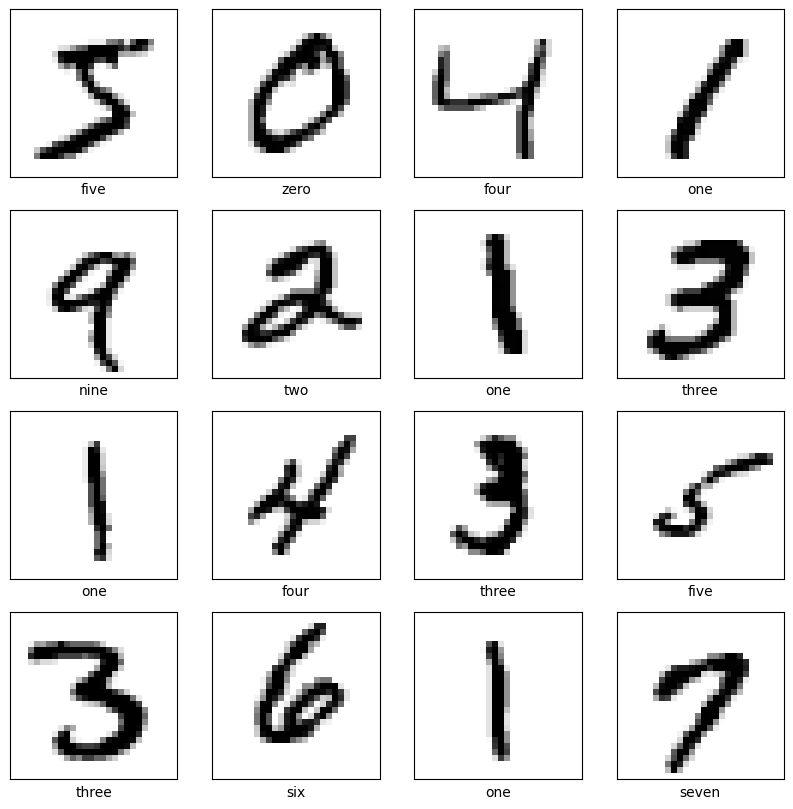

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2941 - accuracy: 0.9129
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1422 - accuracy: 0.9580
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1062 - accuracy: 0.9678
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0864 - accuracy: 0.9733
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0736 - accuracy: 0.9773


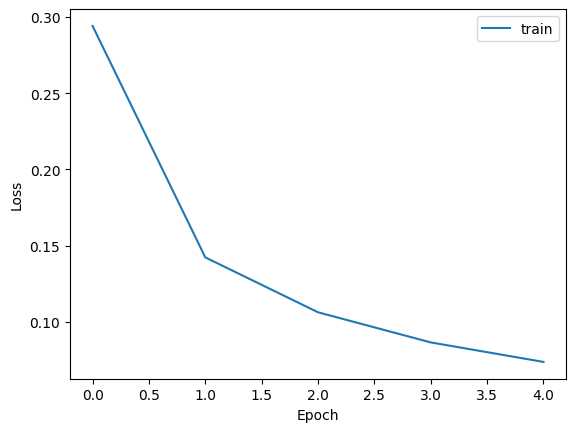

313/313 - 1s - loss: 0.0729 - accuracy: 0.9759 - 700ms/epoch - 2ms/step


[0.07294174283742905, 0.9758999943733215]

In [19]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

from tensorflow.keras.datasets import mnist

# MNIST 데이터셋 로드
(x_train, y_train), (x_test , y_test)= mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

n_train = x_train.shape[0]
n_test = x_test.shape[0]

print(x_train.shape, y_train.shape, y_train[0])
print(x_test.shape, y_test.shape, y_test[0])

class_names = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

plt.figure(figsize=(10, 10))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    img = x_train[i]  # 이미지 데이터를 그대로 사용
    plt.imshow(img, cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])

plt.show()

# 모델 빌드
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5)

# regularized 모델
regularized_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, kernel_regularizer=tf.keras.regularizers.l2(0.001),
                          activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(16, kernel_regularizer=tf.keras.regularizers.l2(0.001),
                          activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

regularized_model.compile(optimizer='adam',
                          loss='binary_crossentropy',
                          metrics=['accuracy', 'binary_crossentropy'])

# train_test_split은 이미 위에서 실행된 부분이 있으므로 다시 하지 않음

# 시각화: training history
plt.figure()
plt.plot(history.history['loss'], label='train')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# 모델 평가
model.evaluate(x_test, y_test, verbose=2)


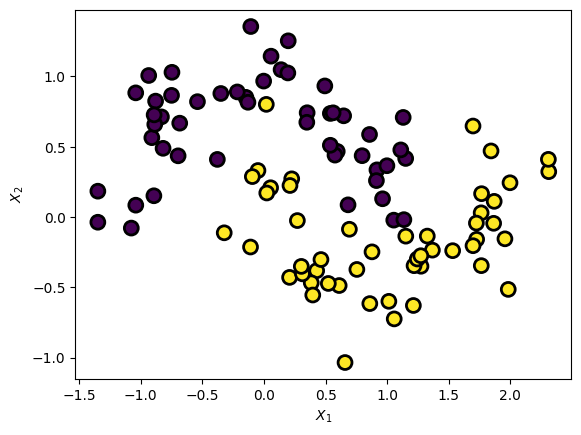

[[ 1.36698238 -0.23541584]
 [ 1.76404402 -0.34563288]
 [-0.37868174  0.41004375]
 [ 1.15113747 -0.13597622]
 [ 2.31168314  0.32295125]]
[1 1 0 1 1]


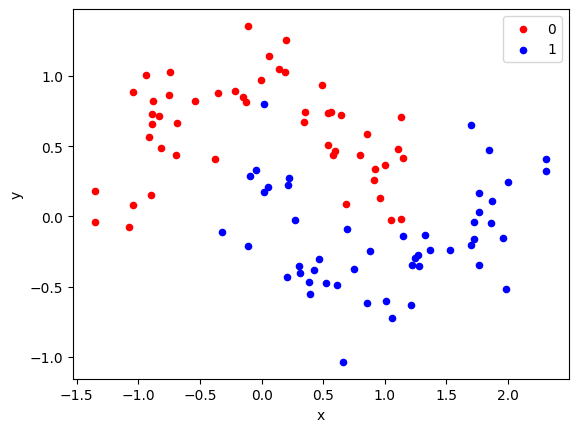

Train acc: 1.000, Test acc: 0.914


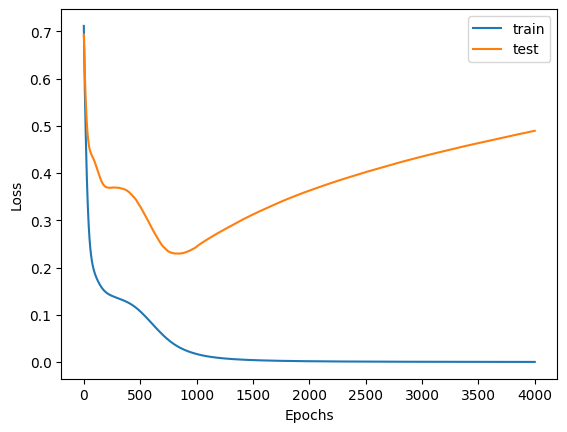

Epoch 955: early stopping
Train acc: 1.000, Test acc: 0.943


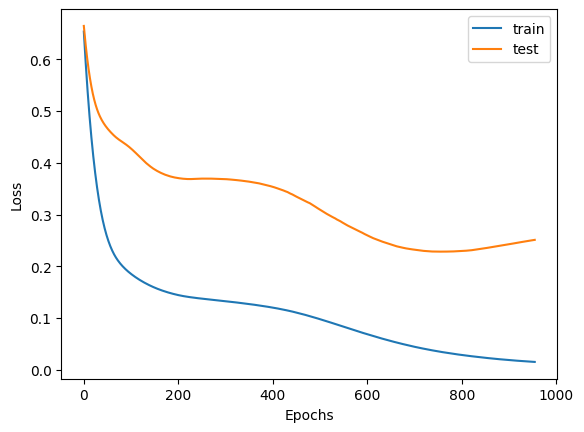

Epoch 1058: early stopping
Train acc: 1.000, Test acc: 0.943


In [20]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# 초승달 모양의 두 개 클러스터 데이터 생성
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
plt.scatter(X[:,0], X[:,1], marker='o', c=y, s=100, edgecolor='k', linewidth=2)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()
print(X[0:5,:])
print(y[0:5])

# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=X[:,0], y=X[:, 1], label=y))
df.head()

colors = {0: 'red', 1: 'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

# train과 test로 나누기
n_train = 30
trainX, testX = X[:n_train,:], X[n_train:,:]
trainy, testy = y[:n_train], y[n_train:]

# 모델 정의
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)

# 모델 평가
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train acc: %.3f, Test acc: %.3f' % (train_acc, test_acc))

# 학습 과정 시각화
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# 모델 재정의 (early stopping 적용)
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# early stopping 적용
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

# 모델 학습 (early stopping 적용)
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0, callbacks=[es])

# 모델 평가
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train acc: %.3f, Test acc: %.3f' % (train_acc, test_acc))

# 학습 과정 시각화
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# 모델 재정의 (early stopping 적용)
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# patience 값을 설정한 early stopping 적용
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

# 모델 학습 (early stopping 적용)
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0, callbacks=[es])

# 모델 평가
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train acc: %.3f, Test acc: %.3f' % (train_acc, test_acc))

# 학습 과정 시각화


In [21]:
import tensorflow as tf
import numpy as np

# 데이터
xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

# int -> float
xy = np.array(xy, dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]
print(x_data.shape, y_data.shape)

# (2) hypothesis
tf.random.set_seed(2020)
W = tf.Variable(tf.random.normal([4, 1], mean=0.0), name='weight')
b = tf.Variable(tf.random.normal([1], mean=0.0), name='bias')

def hypothesis(X):
    return tf.matmul(X, W) + b

# (3) cost function
def cost_fn(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# (4) stochastic gradient descent algorithm to minimize cost function
learning_rate = 0.001
optimizer = tf.optimizers.SGD(learning_rate)

# training
for step in range(2001):
    with tf.GradientTape() as g:
        pred = hypothesis(x_data)
        cost = cost_fn(pred, y_data)

    # gradient 계산
    gradients = g.gradient(cost, [W, b])
    # gradients에 따라 W와 b 업데이트
    optimizer.apply_gradients(zip(gradients, [W, b]))

    if step % 500 == 0:
        print("step =", '%04d' % (step), "cost = {:.6f}".format(cost.numpy()), "W =", W.numpy(), "b =", b.numpy())

w_hat = W.numpy()
b_hat = b.numpy()
print('weights = \n', w_hat)
print('bias = \n', b_hat)

# MinMaxScaler 함수 정의
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

# int -> float
xy = np.array(xy, dtype=np.float32)

# 매우 중요: MinMaxScaler를 적용하지 않으면 작동하지 않습니다.
xy = MinMaxScaler(xy)
print(xy)

x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]
print(x_data.shape, y_data.shape)


(8, 4) (8, 1)
step = 0000 cost = 4382490624000.000000 W = [[-3.3485145e+06]
 [-3.3680360e+06]
 [-5.3900549e+09]
 [-3.3410470e+06]] b = [-4091.3438]
step = 0500 cost = nan W = [[nan]
 [nan]
 [nan]
 [nan]] b = [nan]
step = 1000 cost = nan W = [[nan]
 [nan]
 [nan]
 [nan]] b = [nan]
step = 1500 cost = nan W = [[nan]
 [nan]
 [nan]
 [nan]] b = [nan]
step = 2000 cost = nan W = [[nan]
 [nan]
 [nan]
 [nan]] b = [nan]
weights = 
 [[nan]
 [nan]
 [nan]
 [nan]]
bias = 
 [nan]
[[1.         1.         0.         1.         1.        ]
 [0.70548487 0.70439553 1.         0.71881783 0.8375579 ]
 [0.5441255  0.50274825 0.57608694 0.606468   0.6606331 ]
 [0.33890355 0.31368026 0.10869565 0.45989135 0.4380092 ]
 [0.51436    0.4258239  0.3043478  0.5850481  0.42624405]
 [0.4955618  0.4258239  0.3152174  0.48131135 0.49276137]
 [0.11436066 0.         0.20652173 0.22007777 0.1859724 ]
 [0.         0.077471   0.5326087  0.         0.        ]]
(8, 4) (8, 1)


In [22]:
import tensorflow as tf
import numpy as np

# 데이터
xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

# int -> float
xy = np.array(xy, dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]
print(x_data.shape, y_data.shape)

# (2) hypothesis
tf.random.set_seed(2020)
W = tf.Variable(tf.random.normal([4, 1], mean=0.0), name='weight')
b = tf.Variable(tf.random.normal([1], mean=0.0), name='bias')

def hypothesis(X):
    return tf.matmul(X, W) + b

# (3) cost function
def cost_fn(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# (4) stochastic gradient descent algorithm to minimize cost function
learning_rate = 0.001
optimizer = tf.optimizers.SGD(learning_rate)

# training
for step in range(2001):
    with tf.GradientTape() as g:
        pred = hypothesis(x_data)
        cost = cost_fn(pred, y_data)

    # gradient 계산
    gradients = g.gradient(cost, [W, b])
    # gradients에 따라 W와 b 업데이트
    optimizer.apply_gradients(zip(gradients, [W, b]))

    if step % 500 == 0:
        print("step =", '%04d' % (step), "cost = {:.6f}".format(cost.numpy()), "W =", W.numpy(), "b =", b.numpy())

w_hat = W.numpy()
b_hat = b.numpy()
print('weights = \n', w_hat)
print('bias = \n', b_hat)

# MinMaxScaler 함수 정의
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

# int -> float
xy = np.array(xy, dtype=np.float32)

# 매우 중요: MinMaxScaler를 적용하지 않으면 작동하지 않습니다.
xy = MinMaxScaler(xy)
print(xy)

x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]
print(x_data.shape, y_data.shape)


(8, 4) (8, 1)
step = 0000 cost = 4382490624000.000000 W = [[-3.3485145e+06]
 [-3.3680360e+06]
 [-5.3900549e+09]
 [-3.3410470e+06]] b = [-4091.3438]
step = 0500 cost = nan W = [[nan]
 [nan]
 [nan]
 [nan]] b = [nan]
step = 1000 cost = nan W = [[nan]
 [nan]
 [nan]
 [nan]] b = [nan]
step = 1500 cost = nan W = [[nan]
 [nan]
 [nan]
 [nan]] b = [nan]
step = 2000 cost = nan W = [[nan]
 [nan]
 [nan]
 [nan]] b = [nan]
weights = 
 [[nan]
 [nan]
 [nan]
 [nan]]
bias = 
 [nan]
[[1.         1.         0.         1.         1.        ]
 [0.70548487 0.70439553 1.         0.71881783 0.8375579 ]
 [0.5441255  0.50274825 0.57608694 0.606468   0.6606331 ]
 [0.33890355 0.31368026 0.10869565 0.45989135 0.4380092 ]
 [0.51436    0.4258239  0.3043478  0.5850481  0.42624405]
 [0.4955618  0.4258239  0.3152174  0.48131135 0.49276137]
 [0.11436066 0.         0.20652173 0.22007777 0.1859724 ]
 [0.         0.077471   0.5326087  0.         0.        ]]
(8, 4) (8, 1)


In [23]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# StandardScaler 함수 정의
def StandardScaler_(x):
    numerator = x - np.mean(x, axis=0)
    denominator = np.std(x, axis=0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

# 데이터
xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

# int -> float
xy = np.array(xy, dtype=np.float32)

# 매우 중요: MinMaxScaler를 적용하지 않으면 작동하지 않습니다.
# xy_scaled = StandardScaler_(xy)
scaler = StandardScaler()
xy_scaled = scaler.fit_transform(xy)
print(xy_scaled)

x_data = xy_scaled[:, 0:-1]
y_data = xy_scaled[:, [-1]]
print(x_data.shape, y_data.shape)

# (2) hypothesis
tf.random.set_seed(2020)
W = tf.Variable(tf.random.normal([4, 1], mean=0.0), name='weight')
b = tf.Variable(tf.random.normal([1], mean=0.0), name='bias')

def hypothesis(X):
    return tf.matmul(X, W) + b

# (3) cost function
def cost_fn(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# (4) stochastic gradient descent algorithm to minimize cost function
learning_rate = 0.001
optimizer = tf.optimizers.SGD(learning_rate)

# training
for step in range(2001):
    with tf.GradientTape() as g:
        pred = hypothesis(x_data)
        cost = cost_fn(pred, y_data)

    # gradient 계산
    gradients = g.gradient(cost, [W, b])
    # gradients에 따라 W와 b 업데이트
    optimizer.apply_gradients(zip(gradients, [W, b]))

    if step % 500 == 0:
        print("step =", '%04d' % (step), "cost = {:.6f}".format(cost.numpy()), "W =", W.numpy(), "b =", b.numpy())

w_hat = W.numpy()
b_hat = b.numpy()
print('weights = \n', w_hat)
print('bias = \n', b_hat)

# MinMaxScaler 함수 정의
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

# int -> float
xy = np.array(xy, dtype=np.float32)

# 매우 중요: MinMaxScaler를 적용하지 않으면 작동하지 않습니다.
xy = MinMaxScaler(xy)
print(xy)

x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]
print(x_data.shape, y_data.shape)


[[ 1.8004487   1.8851336  -1.2823008   1.7278715   1.618899  ]
 [ 0.8109751   0.9053588   2.0883183   0.7384643   1.0874736 ]
 [ 0.2688607   0.23700316  0.65946895  0.34313437  0.50866824]
 [-0.42061728 -0.38965878 -0.91592914 -0.172631   -0.21964055]
 [ 0.1688586  -0.01796104 -0.25646016  0.26776302 -0.25812998]
 [ 0.10570277 -0.01796104 -0.21982299 -0.09725961 -0.04052008]
 [-1.1750072  -1.4293454  -0.58619463 -1.0164729  -1.044173  ]
 [-1.5592213  -1.1725694   0.5129203  -1.7908697  -1.6525773 ]]
(8, 4) (8, 1)
step = 0000 cost = 2.661390 W = [[-0.10184213]
 [ 0.6837647 ]
 [ 1.6228421 ]
 [ 0.8804678 ]] b = [0.38337782]
step = 0500 cost = 0.360732 W = [[-0.24262328]
 [ 0.48281068]
 [ 0.6701537 ]
 [ 0.7983778 ]] b = [0.14089568]
step = 1000 cost = 0.074274 W = [[-0.253615  ]
 [ 0.44675997]
 [ 0.32046735]
 [ 0.81065464]] b = [0.05178075]
step = 1500 cost = 0.035979 W = [[-0.25541756]
 [ 0.43331262]
 [ 0.19281165]
 [ 0.8194359 ]] b = [0.01903001]
step = 2000 cost = 0.030815 W = [[-0.2558